# Análisis exploratorio de los Datos.

Importemos las librerías que utilizaremos para realizar nuestro análisis.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import json
from urllib.request import urlopen

Hacemos la solicitud de las principales características de las 12 criptomonedas con mayor capitalización que nos brinda la API de CoinGekco. A partir de las librerías de json y urlopen, procedemos a obtener los datos de la siguiente manera:

In [2]:
# Guardamos el url en una variable.
url = 'https://api.coingecko.com/api/v3/coins/markets?vs_currency=usd&ids=bitcoin%2Cethereum%2Ctether%2Cbinancecoin%2Cripple%2Cusd-coin%2Cstaked-ether%2Cdogecoin%2Ccardano%2Csolana%2Ctron%2Cmatic-network&order=market_cap_desc&per_page=100&page=1&sparkline=false&price_change_percentage=24h%2C%207d%2C30d%2C1y&locale=en&precision=10'

# Accedemos a la respuesta de la API con 'urlopen':
response = urlopen(url)
# Leemos la respuesta que nos dió la API y lo tratamos como un json.
data = json.loads(response.read())
# Transformamos la data recibida, en un dataframe.
df = pd.DataFrame(data)

La dirección web de la que obtuvimos la solicitud es la Web de CoinGekco. ([Documentation](https://www.coingecko.com/es/api/documentation))

Visualizamos las 5 mejores criptomonedas.


In [3]:
df.head()

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated,price_change_percentage_1y_in_currency,price_change_percentage_24h_in_currency,price_change_percentage_30d_in_currency
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,29447.466723,572798377279,1,618332500385,11058906952,29665.000000,...,-57.35046,2021-11-10T14:24:11.849Z,67.810000,43326.79777,2013-07-06T00:00:00.000Z,None,2023-08-10T22:49:53.357Z,22.968691,-0.329271,-3.627799
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,1850.942129,222373849584,2,222373849584,3772200837,1862.320000,...,-62.06153,2021-11-10T14:24:19.604Z,0.432979,427342.87816,2015-10-20T00:00:00.000Z,"{'times': 83.04834191337433, 'currency': 'btc'...",2023-08-10T22:49:53.315Z,-0.400285,-0.136235,-1.256769
2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,0.998774,83435237753,3,83435237753,14995141836,1.001000,...,-24.50804,2018-07-24T00:00:00.000Z,0.572521,74.46181,2015-03-02T00:00:00.000Z,None,2023-08-10T22:45:00.682Z,-0.202497,-0.048669,-0.103315
3,binancecoin,bnb,BNB,https://assets.coingecko.com/coins/images/825/...,241.023291,37087834118,4,48211051841,340648725,244.090000,...,-64.87645,2021-05-10T07:24:17.097Z,0.039818,605297.28871,2017-10-19T00:00:00.000Z,None,2023-08-10T22:49:56.023Z,-26.662327,-0.990821,-2.744764
4,ripple,xrp,XRP,https://assets.coingecko.com/coins/images/44/l...,0.632625,33408786800,5,63289459091,1106661317,0.645305,...,-81.37856,2018-01-07T00:00:00.000Z,0.002686,23458.88241,2014-05-22T00:00:00.000Z,None,2023-08-10T22:49:48.626Z,66.361848,-0.794934,32.958089


Vemos las columnas y tomamos de ellas las que consideremos óptimas para realizar nuestro análisis.

In [4]:
df.columns

Index(['id', 'symbol', 'name', 'image', 'current_price', 'market_cap',
       'market_cap_rank', 'fully_diluted_valuation', 'total_volume',
       'high_24h', 'low_24h', 'price_change_24h',
       'price_change_percentage_24h', 'market_cap_change_24h',
       'market_cap_change_percentage_24h', 'circulating_supply',
       'total_supply', 'max_supply', 'ath', 'ath_change_percentage',
       'ath_date', 'atl', 'atl_change_percentage', 'atl_date', 'roi',
       'last_updated', 'price_change_percentage_1y_in_currency',
       'price_change_percentage_24h_in_currency',
       'price_change_percentage_30d_in_currency'],
      dtype='object')

De las columnas obtenidas en el cuadro anterior, comentamos las columnas que no queremos que estén dentro de nuestro dataframe. El cual analizaremos con la copia de este en otro dataframe.


In [5]:
df1 = df[[
    #'id',
#    'symbol', 
    'name',
#    'image', 
    'current_price', 'market_cap',
    'market_cap_rank', 
    #    'fully_diluted_valuation', 
    'total_volume',
    #    'high_24h', 
    # 'low_24h', 
    # 'price_change_24h',
    #'price_change_percentage_24h',
    'market_cap_change_24h',
    #    'market_cap_change_percentage_24h',
    'circulating_supply',
    'total_supply',
    'max_supply',
    'ath',
    'ath_change_percentage',
    'ath_date', 
    #    'atl', 
    # 'atl_change_percentage', 
    # 'atl_date',
    #    'roi',
    #    'last_updated',
    'price_change_percentage_1y_in_currency',
    'price_change_percentage_30d_in_currency',
    'price_change_percentage_24h_in_currency'
    ]].copy()

---------------

```
Brindamos una breve descripción de las columnas, para ampliar el conocimiento de que clase de datos contiene este dataframe.
```
**name:** Nombre de la criptomoneda.

**current_price:** Precio actual de la moneda, expresado en U$D *(Dólares estadounidenses)*

**market_cap**: Es la capitalización del mercado de la criptomoneda. Es decir, el producto entre el valor actual de la moneda y las cantidad total de la moneda en circulación.

**market_cap_rank:** Es el número del ranking en el que se encuentra, de mayor a menor, en función de su capitalización. *(Este análisis se basa en las 12 criptomonedas que están en lo más alto de este ranking)*

**total_volume**: Representa el total de operaciones que se realizan con la moneda.

**market_cap_change_24h:** Es el valor de cambio de la moneda en las últimas 24 horas.

**circulating_supply:** Representa la cantidad de monedas en circulación de la Criptomoneda.

**total_supply:** La cantidad total de monedas de una criptomoneda que existirá en total.

**max_supply:**  La cantidad máxima de monedas que una criptomoneda puede tener en circulación, si está limitada.

**ath:** El precio más alto al que llegó la criptomoneda.

**ath_change_percentage:**  El cambio porcentual desde el máximo histórico de una criptomoneda.

**ath_date:** La fecha en que se alcanzó el máximo histórico de una criptomoneda.

**price_change_percentage_1y_in_currency:** El cambio porcentual en el precio de la criptomoneda en el último año.

**price_change_percentage_30d_in_currency**: El cambio porcentual en el precio de la criptomoneda en los últimos 30 días.

**price_change_percentage_24h_in_currency:** El cambio porcentual en el precio de la criptomoneda en las últimas 24 horas.

--------------------------------------

Continuamos con el análisis.

Vemos ahora que el dataframe ha conservado las 12 columnas con las correspondientes Coins, pero ha reducido a 15 las columnas.


In [6]:
df1.shape

(12, 15)

Visualicemos el dataframe.


In [7]:
df1

,name,current_price,market_cap,market_cap_rank,total_volume,market_cap_change_24h,circulating_supply,total_supply,max_supply,ath,ath_change_percentage,ath_date,price_change_percentage_1y_in_currency,price_change_percentage_30d_in_currency,price_change_percentage_24h_in_currency
0,Bitcoin,29447.466723,572798377279,1,11058906952,-2.052316e+09,1.945356e+07,2.100000e+07,2.100000e+07,69045.000000,-57.35046,2021-11-10T14:24:11.849Z,22.968691,-3.627799,-0.329271
1,Ethereum,1850.942129,222373849584,2,3772200837,-2.049452e+08,1.201525e+08,1.201525e+08,NaN,4878.260000,-62.06153,2021-11-10T14:24:19.604Z,-0.400285,-1.256769,-0.136235
2,Tether,0.998774,83435237753,3,14995141836,-3.591329e+07,8.353293e+10,8.353293e+10,NaN,1.320000,-24.50804,2018-07-24T00:00:00.000Z,-0.202497,-0.103315,-0.048669
3,BNB,241.023291,37087834118,4,340648725,-3.611118e+08,1.538562e+08,1.538562e+08,2.000000e+08,686.310000,-64.87645,2021-05-10T07:24:17.097Z,-26.662327,-2.744764,-0.990821
4,XRP,0.632625,33408786800,5,1106661317,-1.433326e+08,5.278728e+10,9.998852e+10,1.000000e+11,3.400000,-81.37856,2018-01-07T00:00:00.000Z,66.361848,32.958089,-0.794934
5,USD Coin,0.999958,26160807459,6,2711221001,-1.277939e+08,2.615588e+10,2.615588e+10,NaN,1.170000,-14.71205,2019-05-08T00:40:28.300Z,-0.002858,0.055677,-0.018385
6,Lido Staked Ether,1849.459920,14886196381,7,22434483,2.848338e+07,8.048990e+06,8.049512e+06,8.049512e+06,4829.570000,-61.70471,2021-11-10T14:40:47.256Z,2.992254,-1.242221,-0.217859
7,Dogecoin,0.075693,10637269654,8,440649352,1.297395e+08,1.405382e+11,1.405383e+11,NaN,0.731578,-89.65382,2021-05-08T05:08:23.458Z,6.343197,16.518706,1.129555
8,Cardano,0.296684,10400177872,9,179130407,-1.274689e+08,3.504502e+10,4.500000e+10,4.500000e+10,3.090000,-90.38631,2021-09-02T06:00:10.474Z,-44.655906,2.078407,-1.444585
9,Solana,24.637427,10011820867,10,355912828,1.545415e+08,4.056833e+08,5.545784e+08,NaN,259.960000,-90.50555,2021-11-06T21:54:35.825Z,-41.820101,12.580356,1.498898


Vemos ahora, cuales son los tipos de datos que están contenidos en las columnas de este dataframe.

In [8]:
df1.dtypes

name                                        object
current_price                              float64
market_cap                                   int64
market_cap_rank                              int64
total_volume                                 int64
market_cap_change_24h                      float64
circulating_supply                         float64
total_supply                               float64
max_supply                                 float64
ath                                        float64
ath_change_percentage                      float64
ath_date                                    object
price_change_percentage_1y_in_currency     float64
price_change_percentage_30d_in_currency    float64
price_change_percentage_24h_in_currency    float64
dtype: object

Vemos que la columna de *'ath_date'* contiene datos en un formato que podría modficar el análisis. Puesto que en esa columna debe ir una fecha, en la cual la moneda alcanzó su precio más alto.

Veamos como podemos modificarlo, para obtener los datos en un formato de fecha.

In [9]:
# Veamos un ejemplo de como están escritas las fechas:
df1['ath_date'][0]

'2021-11-10T14:24:11.849Z'

In [10]:
# Creamos una lista donde pasaremos los strings de la columna 'ath_date'.
lista_de_fechas=[]
# Creamos un bucle que itere en la columna.
for txt in df1['ath_date']:
    # Creamos un strings vacío que irá agregando cada letra que corresponda.
    strings = ""
    # Iteramos por cada letra del string.
    for letra in txt:
        # Si la letra, que no es número, es la letra "T" se agregará un espacio.
        if letra == "T":
            strings = str(strings) + " "
        # Cuando, en la iteración, la letra es un punto la iteración se interrumpe y continúa al siguiente string.
        elif letra == ".":
            break
        # Si no cumple ninguna de las excepciones anteriores, agrega la letra al string.
        else:
            strings = str(strings) + str(letra)
    # Cuando se detiene el bucle de iteración y la variable 'strings' contiene la información, se agrega a 'lista_de_fechas'
    lista_de_fechas.append(strings)
# Transformamos los datos a un formato fecha y lo asignamos a la columna.
df1['ath_date'] = pd.to_datetime(lista_de_fechas)

Verifiquemos que el cambio en la columna se haya producido correctamente:

In [11]:
df1.dtypes

name                                               object
current_price                                     float64
market_cap                                          int64
market_cap_rank                                     int64
total_volume                                        int64
market_cap_change_24h                             float64
circulating_supply                                float64
total_supply                                      float64
max_supply                                        float64
ath                                               float64
ath_change_percentage                             float64
ath_date                                   datetime64[ns]
price_change_percentage_1y_in_currency            float64
price_change_percentage_30d_in_currency           float64
price_change_percentage_24h_in_currency           float64
dtype: object

Veamos el ejemplo anterior:

In [12]:
df1['ath_date'][0]

Timestamp('2021-11-10 14:24:11')

Ahora observemos cuando obtuvieron su precio más alto, cada Coin. Del más antiguo al más reciente.

In [13]:
df1[['name', 'ath_date', 'ath']].sort_values('ath_date', ascending= True)

,name,ath_date,ath
10,TRON,2018-01-05 00:00:00,0.231673
4,XRP,2018-01-07 00:00:00,3.400000
2,Tether,2018-07-24 00:00:00,1.320000
5,USD Coin,2019-05-08 00:40:28,1.170000
7,Dogecoin,2021-05-08 05:08:23,0.731578
3,BNB,2021-05-10 07:24:17,686.310000
8,Cardano,2021-09-02 06:00:10,3.090000
9,Solana,2021-11-06 21:54:35,259.960000
0,Bitcoin,2021-11-10 14:24:11,69045.000000
1,Ethereum,2021-11-10 14:24:19,4878.260000


Como podemos ver en la tabla, las criptos que obtuvieron su precio más alto en una fecha más reciente, lo tuvieron en un mismo año, en un lapso de siete meses. Podríamos considerar que el mercado de criptomonedas estuvo en alza en esos meses y considerarlo como hipótesis. Luego podemos solicitar otros datos a la API, para poder confirmar o refutar esta hipótesis.

Pero por ahora, prosigamos con el análisis de este dataset.

Como podemos ver en la tabla anterior, los precios más altos de las criptomonedas pueden estar distanciados por miles de dólares. Veamos el precio actual de cada uno y la cantidad de monedas que están en circulación, para ver si existe una relación.

In [14]:
# Aplicamos un 'sort_values' para visualizar, de menor a mayor, las Coins con menos monedas en circulación.
df1[['name','current_price', 'circulating_supply']].sort_values('circulating_supply', ascending= True)

,name,current_price,circulating_supply
6,Lido Staked Ether,1849.459920,8.048990e+06
0,Bitcoin,29447.466723,1.945356e+07
1,Ethereum,1850.942129,1.201525e+08
3,BNB,241.023291,1.538562e+08
9,Solana,24.637427,4.056833e+08
11,Polygon,0.685514,9.319469e+09
5,USD Coin,0.999958,2.615588e+10
8,Cardano,0.296684,3.504502e+10
4,XRP,0.632625,5.278728e+10
2,Tether,0.998774,8.353293e+10


Como podemos ver, a pesar de que Lido Staker Ether no continue el patrón que las otras monedas siguen, existe una relación entre la cantidad de monedas en circulación y el precio. Mientras la cantidad de monedas en circulación aumenta, el precio de las Coins disminuye. 
Veamos un gráfico.

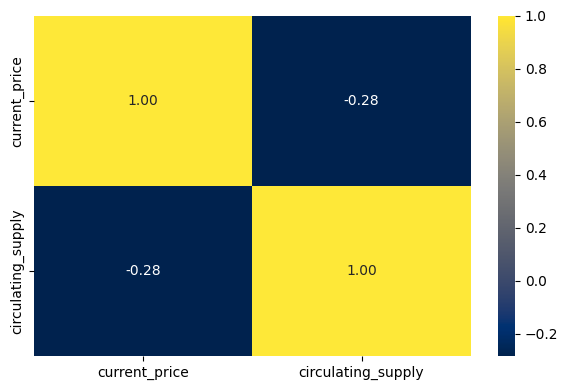

In [15]:
corr = df1[['current_price', 'circulating_supply']].corr()
fig = plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot= True, cmap= 'cividis', fmt= ".2f")

plt.tight_layout()
plt.show()

Como la matriz nos muestra, la correlación entre las variables es negativa, significa que mientras una variable sube, la otra disminuye. Es decir, mientras la cantidad de monedas es mayor, el precio disminuye. Si bien es una relación que existe, no está directamente relacionada con los precios, hay muchas otras razones.

Procedamos a revisar la capitalización de las criptomonedas.

In [16]:
df1[['name', 'market_cap', 'current_price', 'circulating_supply']]

,name,market_cap,current_price,circulating_supply
0,Bitcoin,572798377279,29447.466723,1.945356e+07
1,Ethereum,222373849584,1850.942129,1.201525e+08
2,Tether,83435237753,0.998774,8.353293e+10
3,BNB,37087834118,241.023291,1.538562e+08
4,XRP,33408786800,0.632625,5.278728e+10
5,USD Coin,26160807459,0.999958,2.615588e+10
6,Lido Staked Ether,14886196381,1849.459920,8.048990e+06
7,Dogecoin,10637269654,0.075693,1.405382e+11
8,Cardano,10400177872,0.296684,3.504502e+10
9,Solana,10011820867,24.637427,4.056833e+08


Calculemos la capitalización a partir del precio actual y la cantidad de monedas en circulación.

In [18]:
calculated_cap = df1['current_price'] * df1['circulating_supply']
df1['calculated_cap'] = calculated_cap

df1[['name', 'calculated_cap', 'market_cap', 'current_price']]

,name,calculated_cap,market_cap,current_price
0,Bitcoin,5.728579e+11,572798377279,29447.466723
1,Ethereum,2.223953e+11,222373849584,1850.942129
2,Tether,8.343052e+10,83435237753,0.998774
3,BNB,3.708292e+10,37087834118,241.023291
4,XRP,3.339454e+10,33408786800,0.632625
5,USD Coin,2.615477e+10,26160807459,0.999958
6,Lido Staked Ether,1.488628e+10,14886196381,1849.459920
7,Dogecoin,1.063774e+10,10637269654,0.075693
8,Cardano,1.039729e+10,10400177872,0.296684
9,Solana,9.994992e+09,10011820867,24.637427


Como podemos ver, son similares en cierto punto. Aunque, es verdad, la notación científica dentro de la columna de ```calculated_cap``` produce discrepancia entre el dato obtenido de CoinGekco y el dato calculado.

También podemos sacar una conclusión de esta tabla: El precio de la Coin no tiene relación con su capitalización, es decir; que la Coin aumente su valor no significa que su capitalización aumente, ya que ésta también depende de la cantidad de monedas que haya en circulación.

In [19]:
df1.columns

Index(['name', 'current_price', 'market_cap', 'market_cap_rank',
       'total_volume', 'market_cap_change_24h', 'circulating_supply',
       'total_supply', 'max_supply', 'ath', 'ath_change_percentage',
       'ath_date', 'price_change_percentage_1y_in_currency',
       'price_change_percentage_30d_in_currency',
       'price_change_percentage_24h_in_currency', 'calculated_cap'],
      dtype='object')

Analicemos, a continuación, que tantos cambios tuvieron estas criptomonedas en distintos lapsos de tiempo.

In [21]:
df1[['name','current_price','market_cap', 'price_change_percentage_1y_in_currency', 'price_change_percentage_30d_in_currency', 'price_change_percentage_24h_in_currency']]

,name,current_price,market_cap,price_change_percentage_1y_in_currency,price_change_percentage_30d_in_currency,price_change_percentage_24h_in_currency
0,Bitcoin,29447.466723,572798377279,22.968691,-3.627799,-0.329271
1,Ethereum,1850.942129,222373849584,-0.400285,-1.256769,-0.136235
2,Tether,0.998774,83435237753,-0.202497,-0.103315,-0.048669
3,BNB,241.023291,37087834118,-26.662327,-2.744764,-0.990821
4,XRP,0.632625,33408786800,66.361848,32.958089,-0.794934
5,USD Coin,0.999958,26160807459,-0.002858,0.055677,-0.018385
6,Lido Staked Ether,1849.459920,14886196381,2.992254,-1.242221,-0.217859
7,Dogecoin,0.075693,10637269654,6.343197,16.518706,1.129555
8,Cardano,0.296684,10400177872,-44.655906,2.078407,-1.444585
9,Solana,24.637427,10011820867,-41.820101,12.580356,1.498898


```RECORDAR QUE LAS COLUMNAS CON LOS CAMBIOS PORCENTUALES EQUIVALEN AL CAMBIO PORCENTUAL DE LA MONEDA RESPECTO A SÍ MISMA EN SU CORREPONDIENTE TIEMPO.```

Podemos tener un análisis interesante de las cripto con la información que obtuvimos de la tabla:

Podemos ver que en el último año las monedas adquirieron valor, lo perdieron o lo mantuvieron, sin importar su valor o su capitalización.

Algunas, como el USD Coin, Tether o Ethereum, tuvieron bajas mínimas en su precio, respecto de su valor hace 1 año. Podríamos decir que se mantuvieron estables.

En cambio, hubo otras que perdieron poder adquisitivo en el último año, como Polygon, Solana, Cardano o BNB. Podemos hacer distinciones entre estas, ya que tanto Polygon y Cardano tienen un precio menor a 1 dolar, por lo que las variaciones decimales de su precio pueden modificar ampliamente su cambio porcentual. Mientras que para Solana o BNB, los porcentajes tienen un peso mayor, lo que significa que sus perdidas podrían considerase mayores.

Ahora, por fin, podemos hablar de las criptomonedas que les fue bien en el último año. Bitcoin tuvo un buen desempeño en comparación con las demás, fue la que aumentó su valor significativamente. Las otras criptos que tuvieron aumento porcentual, tienen precios bajos, lo cual produce que los porcentajes sean más sensibles que los porcentajes de monedas con un precio mayor.